# Required Packages:

In [1]:
import sqlite3

import requests

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

# Dataframe with Voting Information:

#### First, I will add the dataframe to this project.

In [2]:
dff = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')

#### Next, I will drop the unnecessary columns and limit the dataframe to movies that have received at least 1,000 votes.

In [3]:
dff = dff.drop(columns=['genre_ids', 'id', 'original_language','original_title', 'popularity'])

In [4]:
new_df = dff[dff['vote_count'] > 1000]

#### Next, I will create a new column indicating the month that each movie was released

In [5]:
new_df['release_month'] = new_df['release_date'].str[5:7]

<ipython-input-5-2abd5f3ef3f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['release_month'] = new_df['release_date'].str[5:7]


#### Finally, I will sort the dataframe by movies that received the highest rating.

In [6]:
highest_vote_average = new_df.sort_values('vote_average', ascending = False)
highest_vote_average = highest_vote_average.head(1000)

#### I will now replace the numbers with numbers for each month with their corresponding name.

In [7]:
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['01'], 'Jan')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['02'], 'Feb')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['03'], 'Mar')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['04'], 'Apr')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['05'], 'May')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['06'], 'Jun')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['07'], 'Jul')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['08'], 'Aug')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['09'], 'Sep')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['10'], 'Oct')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['11'], 'Nov')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['12'], 'Dec')

#### My organized dataframe is below:

In [8]:
highest_vote_average

,release_date,title,vote_average,vote_count,release_month
20632,2017-04-07,Your Name.,8.6,4161,Apr
17389,2017-04-07,Your Name.,8.6,4161,Apr
20626,2002-09-20,Spirited Away,8.5,7424,Sep
14173,2002-09-20,Spirited Away,8.5,7424,Sep
23861,1993-12-15,Schindler's List,8.5,8065,Dec
...,...,...,...,...,...
140,2010-03-19,The Bounty Hunter,5.7,1627,Mar
11036,2014-12-12,Exodus: Gods and Kings,5.7,2909,Dec
20824,2017-06-23,The Beguiled,5.7,1170,Jun
17425,2016-05-20,Neighbors 2: Sorority Rising,5.7,2829,May


#### My bar graph is below:

(0.0, 10.0)

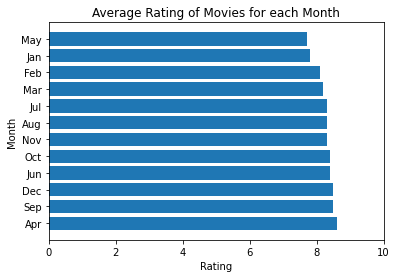

In [9]:
bar2 = plt.barh(highest_vote_average['release_month'], highest_vote_average['vote_average'])
plt.title('Average Rating of Movies for each Month')
plt.xlabel('Rating')
plt.ylabel('Month')
plt.savefig("images/Month_and_Rating")
plt.xlim([0, 10])

# Dataframe with Director and Grossing Information:

#### First, I will add the dataframe with movie grossing information to this project.

In [10]:
df44 = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

#### Next, I will sort the dataframe by worldwide gross and get rid of the commas and dollar signs.

In [11]:
highest_gross = df44.sort_values('worldwide_gross', ascending=False)

In [12]:
highest_gross['worldwide_gross'] = highest_gross['worldwide_gross'].apply(lambda x: x.replace(',', '').replace('$', '')).astype('int64')

#### Then, I will add the dataframe with director information.

In [13]:
df33 = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')

#### Now, I will drop unnecessary columns and rows with null values.

In [14]:
df33 = df33.drop(columns=['rotten_tomatoes_link', 'movie_info', 'critics_consensus', 'original_release_date', 'authors','actors', 'production_company', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'audience_status', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count', 'streaming_release_date', 'runtime'])

In [15]:
df33 = df33.dropna()

#### After that, I will filter out genres that do not contain the word adventure.

In [16]:
df33 = df33[df33['genres'].str.contains('Adventure')]

#### Next, I will merge the two dataframes together based on movie title.

In [17]:
final_df = pd.merge(df33, highest_gross, how='inner', left_on='movie_title', right_on='movie')

#### I will then remove commas and dollar signs and create a profit column.

In [18]:
final_df['production_budget'] = final_df['production_budget'].apply(lambda x: x.replace(',', '').replace('$', '')).astype('int64')

In [19]:
final_df['production_budget'] = final_df['production_budget'].astype('int64')

In [20]:
final_df['profit'] = final_df['worldwide_gross'] - final_df['production_budget']

#### I will create a new dataframe combining the directors top 10 directors so that I can compare their average profits.

In [21]:
directors_df = final_df.groupby('directors').mean()

In [22]:
directors_df = directors_df.sort_values('profit', ascending = False)

In [23]:
directors_df = directors_df.head(10)

#### My organized dataframe is below:

In [24]:
directors_df

,id,production_budget,worldwide_gross,profit
directors,,,,
Jean Negulesco,43.0,200000000.0,2.208208e+09,2.008208e+09
Colin Trevorrow,34.0,215000000.0,1.648855e+09,1.433855e+09
Anthony Russo,12.0,275000000.0,1.594102e+09,1.319102e+09
Ryan Coogler,42.0,200000000.0,1.348258e+09,1.148258e+09
"Chris Buck, Jennifer Lee",56.0,150000000.0,1.272470e+09,1.122470e+09
Brad Bird,44.0,200000000.0,1.242521e+09,1.042521e+09
"Anna Boden, Ryan Fleck",96.0,175000000.0,1.123062e+09,9.480616e+08
"Roger Allers, Rob Minkoff",9.0,79300000.0,9.862149e+08,9.069149e+08
Jake Kasdan,38.0,90000000.0,9.644962e+08,8.744962e+08


#### My bar graph is below:

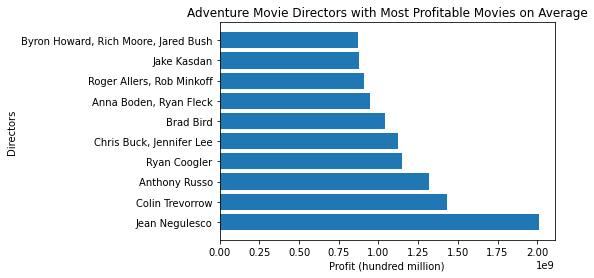

In [25]:
bar4 = plt.barh(directors_df.index, directors_df['profit'])
plt.title('Adventure Movie Directors with Most Profitable Movies on Average')
plt.xlabel('Profit (hundred million)')
plt.ylabel('Directors')
plt.savefig("images/Directors_and_Profit_for_Adventure_Movies", bbox_inches='tight')